## Basemodel

Target:
+ life_ladder  

Features:
+ ~~log_gdp_per_capita~~~

+ HDI


import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
model_name = 'basemodel_hdi'

function section

In [3]:
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_and_hdi_combined.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1987 non-null   object 
 1   year_y                            1987 non-null   float64
 2   life_ladder                       1987 non-null   float64
 3   log_gdp_per_capita                1987 non-null   float64
 4   social_support                    1987 non-null   float64
 5   healthy_life_expectancy_at_birth  1987 non-null   float64
 6   freedom_to_make_life_choices      1987 non-null   float64
 7   perceptions_of_corruption         1987 non-null   float64
 8   positive_affect                   1987 non-null   float64
 9   negative_affect                   1987 non-null   float64
 10  hdi                               1987 non-null   float64
dtypes: float64(10), object(1)
memory usage: 170.9+ KB


Define features and Target:

In [6]:
features = ['hdi']

X = df[features]
y = df['life_ladder']

In [7]:
X.columns

Index(['hdi'], dtype='object')

In [8]:
print(X.shape, y.shape)

(1987, 1) (1987,)


Train-Test-Split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1390, 1) (597, 1) (1390,) (597,)


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled.shape

(1390, 1)

In [13]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [14]:
lin_reg_error_lst = []
for i in range(1,11):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train)
    x_poly_test = polynomial_features.transform(X_test)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = r2_score(y_test, y_pred_poly_test).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = r2_score(y_train, y_pred_poly_train).round(3)

    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})



In [15]:
lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
5,basemodel_hdi_lin_reg_6,0.682,0.649,0.537,0.107,0.657,0.661,0.512,0.102,0.025,0.025,0.012
7,basemodel_hdi_lin_reg_8,0.682,0.649,0.536,0.107,0.656,0.662,0.510,0.101,0.026,0.026,0.013
9,basemodel_hdi_lin_reg_10,0.681,0.650,0.535,0.107,0.655,0.663,0.508,0.101,0.026,0.027,0.013
6,basemodel_hdi_lin_reg_7,0.682,0.649,0.536,0.107,0.652,0.666,0.508,0.101,0.030,0.028,0.017
2,basemodel_hdi_lin_reg_3,0.693,0.637,0.546,0.109,0.662,0.656,0.518,0.103,0.031,0.028,0.019
8,basemodel_hdi_lin_reg_9,0.681,0.650,0.535,0.107,0.649,0.669,0.506,0.100,0.032,0.029,0.019
1,basemodel_hdi_lin_reg_2,0.699,0.631,0.552,0.110,0.664,0.653,0.521,0.102,0.035,0.031,0.022
3,basemodel_hdi_lin_reg_4,0.686,0.645,0.541,0.108,0.650,0.667,0.507,0.100,0.036,0.034,0.022
4,basemodel_hdi_lin_reg_5,0.686,0.645,0.541,0.108,0.650,0.668,0.506,0.100,0.036,0.035,0.023
0,basemodel_hdi_lin_reg_1,0.730,0.598,0.589,0.117,0.693,0.622,0.558,0.110,0.037,0.031,0.024


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51695/2172401743.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


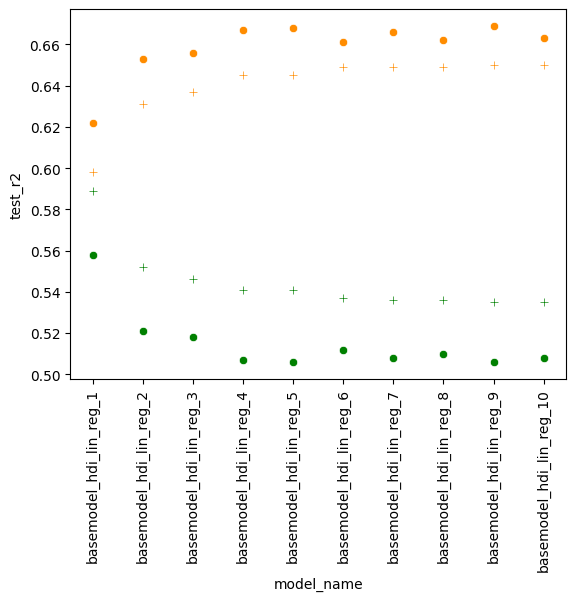

In [16]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green')
#g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mape', color = 'red')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green')
#g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mape', marker='+', color = 'red')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

KNN Model with variable number of neighbors and variable distance metrics

In [17]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(15,20,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr)
        knn.fit(X_train, y_train)
        y_pred_knn_test = knn.predict(X_test)
        y_pred_knn_train = knn.predict(X_train)
        r2_test = r2_score(y_test, y_pred_knn_test).round(3)
        r2_train = r2_score(y_train, y_pred_knn_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

In [18]:
knn_error_df = pd.DataFrame(knn_error_lst)
knn_error_df.sort_values(by = ['delta_R2', 'test_r2'])

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,basemodel_hdi_knn_1_15,0.673,0.515,0.103,0.656,0.518,0.103,0.003,0.017
1,basemodel_hdi_knn_2_15,0.673,0.515,0.103,0.656,0.518,0.103,0.003,0.017
2,basemodel_hdi_knn_3_15,0.673,0.515,0.103,0.656,0.518,0.103,0.003,0.017


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51695/2842831537.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


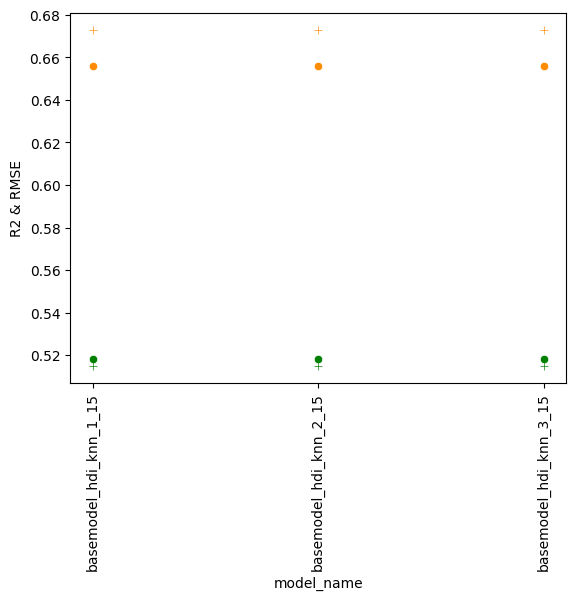

In [19]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [20]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 3,
 'weights': 'uniform'}

Decision Tree Model

In [21]:
dtree = DecisionTreeRegressor(max_depth = 5, 
                            max_leaf_nodes = 20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20)

In [22]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = r2_score(y_test, y_pred_dec_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = r2_score(y_train, y_pred_dec_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.661
train_r2  0.671
train_mae  0.515
train_mape  0.103
test_rmse  0.653
test_r2  0.664
test_mae  0.51
test_mape  0.101


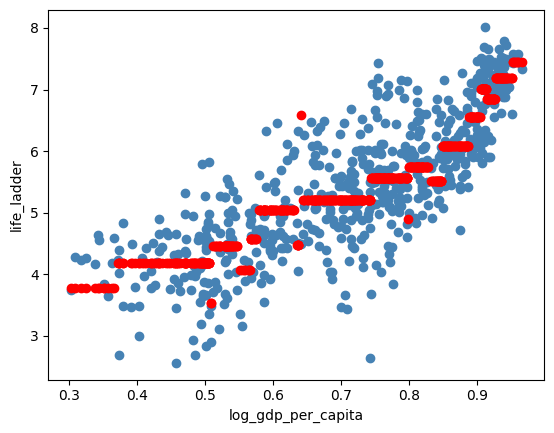

In [23]:
plt.scatter(x=X_test, y=y_test, color='steelblue')
plt.scatter(x=X_test, y=y_pred_dec_test, color='red')
plt.xlabel('log_gdp_per_capita')
plt.ylabel('life_ladder');

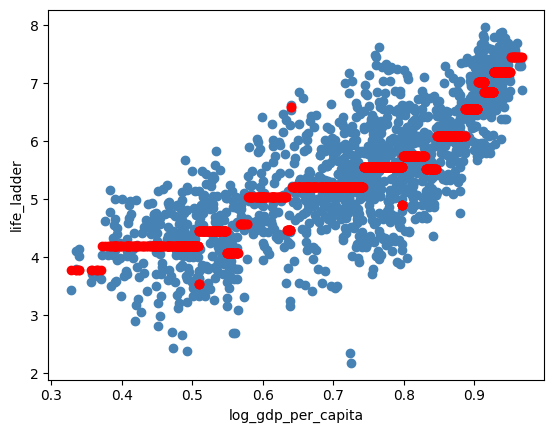

In [24]:
plt.scatter(x=X_train, y=y_train, color='steelblue')
plt.scatter(x=X_train, y=y_pred_dec_train, color='red')
plt.xlabel('log_gdp_per_capita')
plt.ylabel('life_ladder');

In [25]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

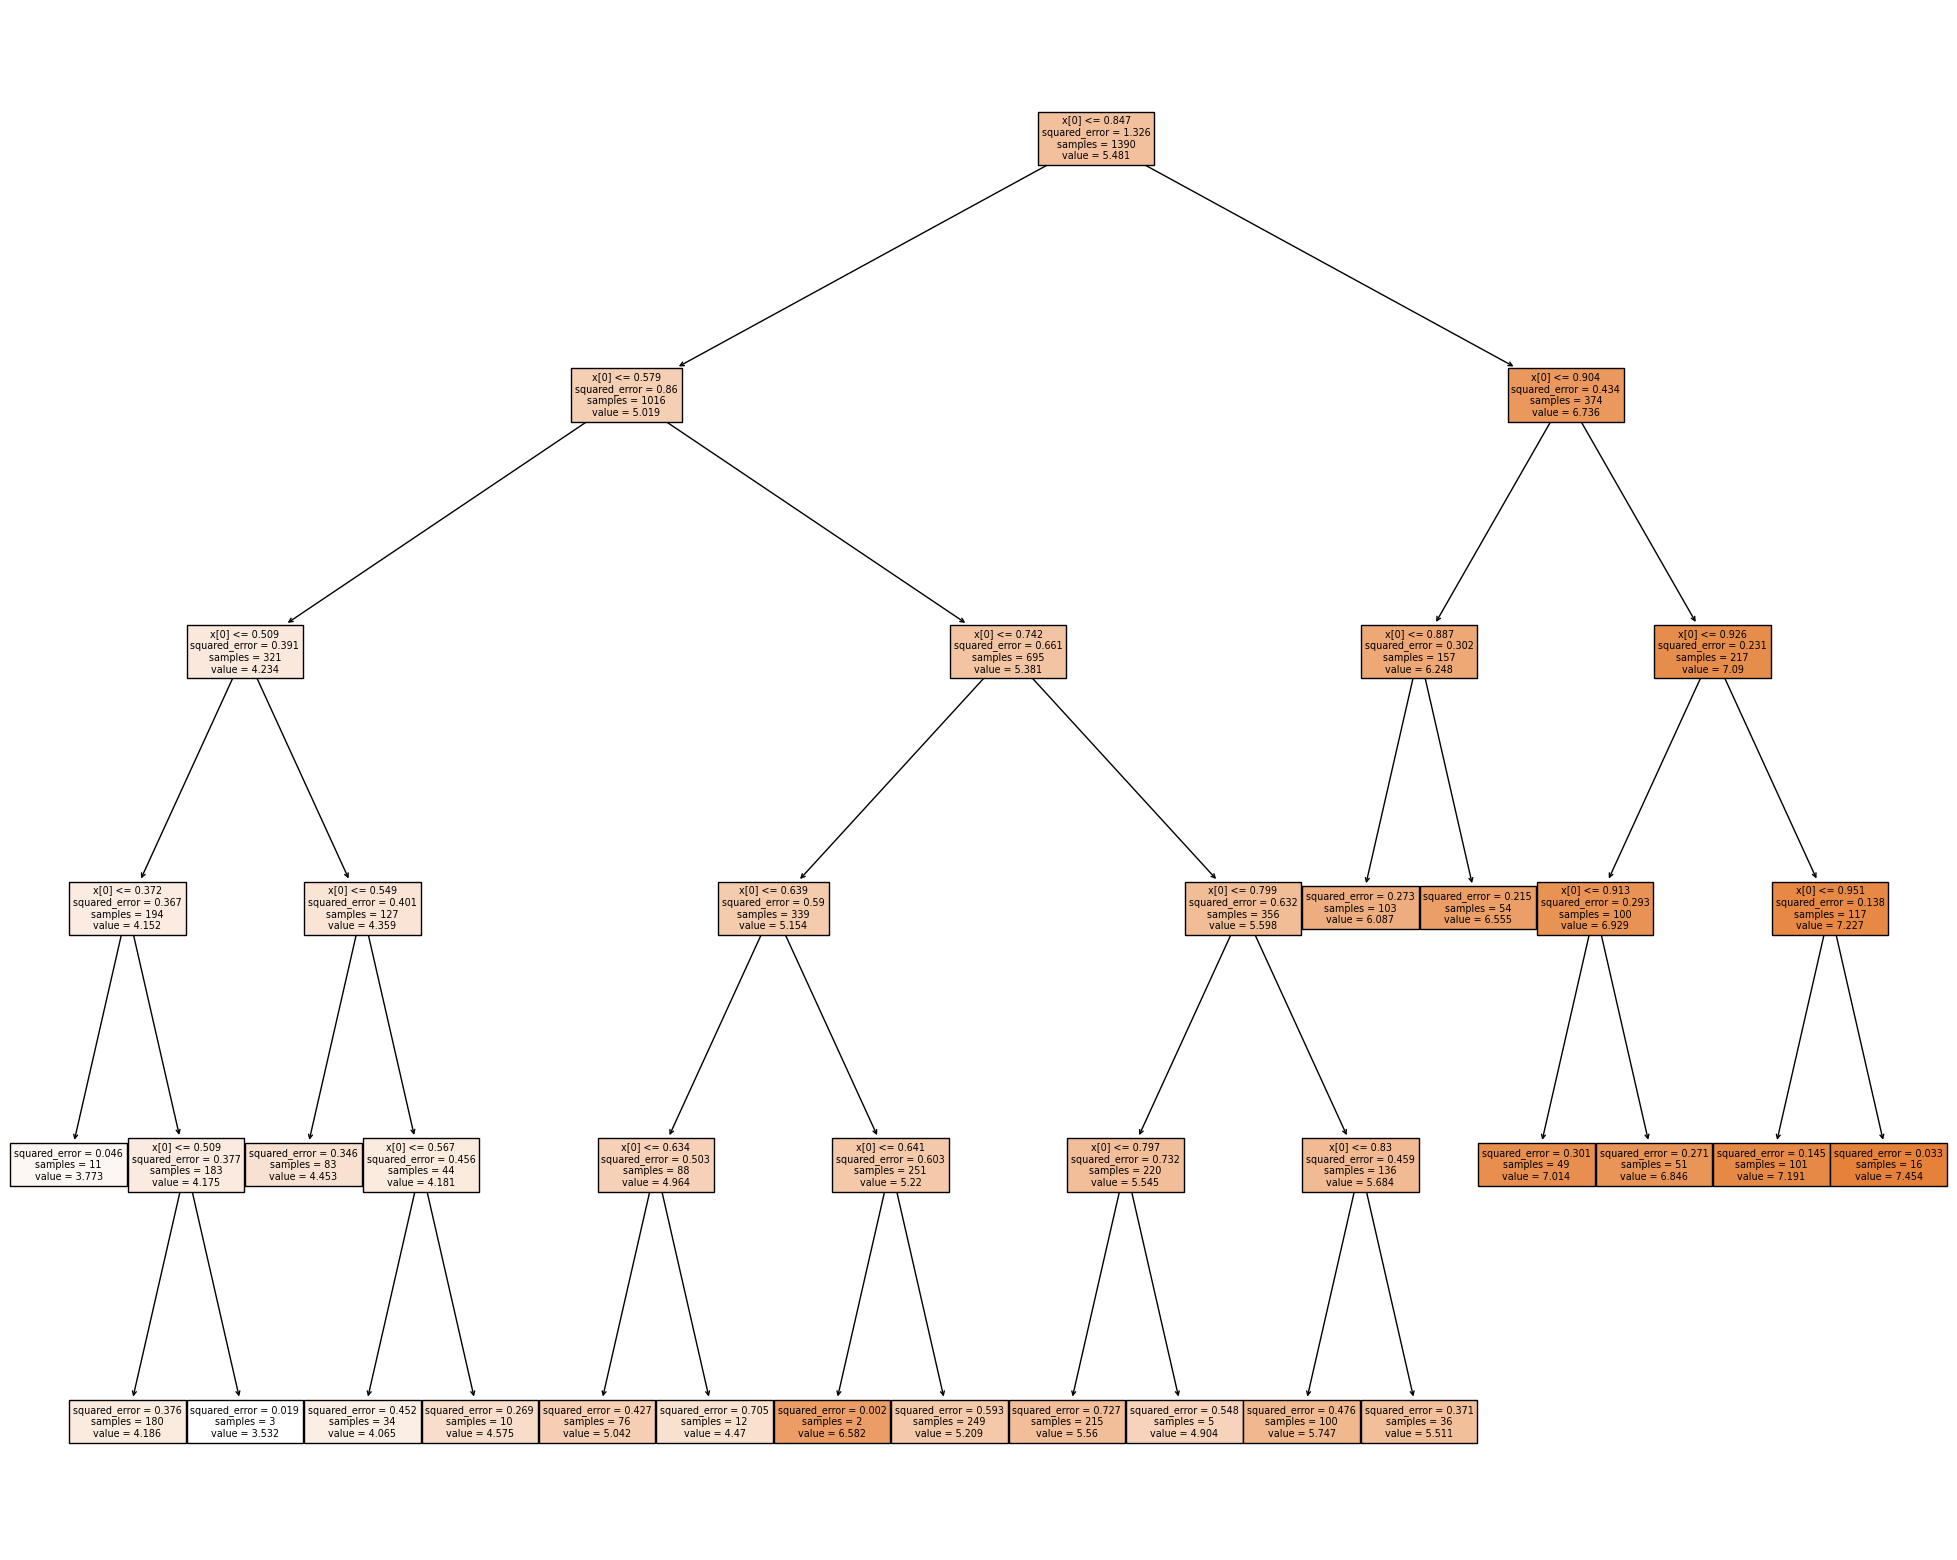

In [26]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True)

In [27]:
dectree_error_lst = []
for depth in np.arange(5,8,1):
    for leaf in np.arange(10,27,2): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = r2_score(y_test, y_pred_dec_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = r2_score(y_train, y_pred_dec_train).round(3)

        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

In [28]:
dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
8,basemodel_hdi_dectree_dep_5_max_leaf_26,0.660,0.672,0.513,0.102,0.655,0.663,0.513,0.102,0.005,0.000,0.009
17,basemodel_hdi_dectree_dep_6_max_leaf_26,0.657,0.675,0.511,0.102,0.656,0.661,0.510,0.101,0.001,0.001,0.014
23,basemodel_hdi_dectree_dep_7_max_leaf_20,0.659,0.673,0.515,0.103,0.660,0.657,0.514,0.102,0.001,0.001,0.016
7,basemodel_hdi_dectree_dep_5_max_leaf_24,0.660,0.671,0.513,0.102,0.654,0.663,0.511,0.101,0.006,0.002,0.008
16,basemodel_hdi_dectree_dep_6_max_leaf_24,0.658,0.674,0.512,0.102,0.655,0.662,0.509,0.101,0.003,0.003,0.012
6,basemodel_hdi_dectree_dep_5_max_leaf_22,0.660,0.671,0.514,0.102,0.654,0.664,0.511,0.101,0.006,0.003,0.007
15,basemodel_hdi_dectree_dep_6_max_leaf_22,0.659,0.673,0.514,0.102,0.655,0.662,0.510,0.101,0.004,0.004,0.011
14,basemodel_hdi_dectree_dep_6_max_leaf_20,0.660,0.671,0.516,0.103,0.657,0.660,0.512,0.102,0.003,0.004,0.011
21,basemodel_hdi_dectree_dep_7_max_leaf_16,0.663,0.669,0.518,0.103,0.658,0.660,0.514,0.102,0.005,0.004,0.009
5,basemodel_hdi_dectree_dep_5_max_leaf_20,0.661,0.671,0.515,0.103,0.653,0.664,0.510,0.101,0.008,0.005,0.007


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51695/2760189379.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


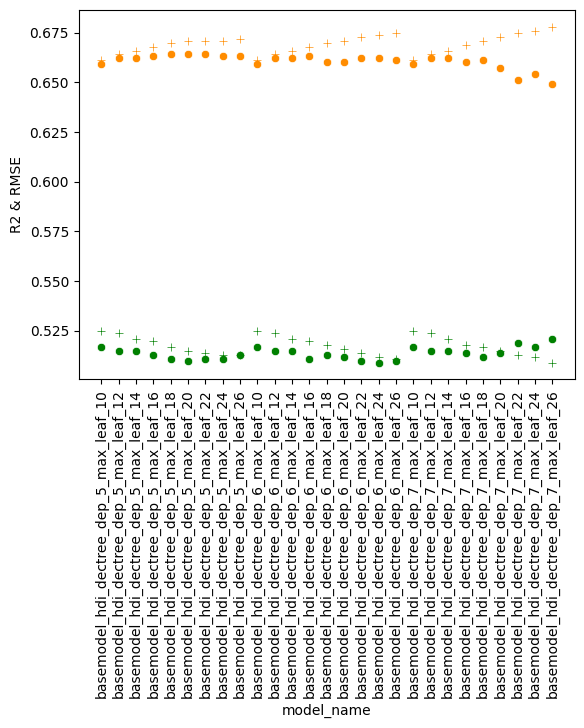

In [29]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Random Forest 

In [30]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 3,
                                max_leaf_nodes = 150,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = r2_score(y_test, y_pred_randforest_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = r2_score(y_train, y_pred_randforest_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 15
Average number of nodes: 15
Max number of nodes: 15
Min maximum depth: 3
Average maximum depth: 3
Max maximum depth: 3
Number of Trees: 100
train_rmse  0.672
train_r2  0.66
train_mae  0.527
train_mape  0.105
test_rmse  0.651
test_r2  0.667
test_mae  0.514
test_mape  0.102


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 150,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [32]:
random_trees_error_lst = []
for tree_depth in np.arange(5,7,1):
    for tree_leaf in np.arange(15,26,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = r2_score(y_test, y_pred_random_forest_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = r2_score(y_train, y_pred_random_forest_train).round(3)

        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees})    

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
4,basemodel_hdi_forest_tree_depth6_max_leaf_20,0.680,0.512,0.102,0.666,0.511,0.101,0.001,0.014,39,6,100
1,basemodel_hdi_forest_tree_depth5_max_leaf_20,0.677,0.513,0.102,0.665,0.512,0.102,0.001,0.012,39,5,100
2,basemodel_hdi_forest_tree_depth5_max_leaf_25,0.679,0.510,0.102,0.665,0.512,0.102,0.002,0.014,49,5,100
5,basemodel_hdi_forest_tree_depth6_max_leaf_25,0.684,0.508,0.101,0.664,0.512,0.102,0.004,0.020,49,6,100
3,basemodel_hdi_forest_tree_depth6_max_leaf_15,0.674,0.516,0.103,0.667,0.510,0.101,0.006,0.007,29,5,100
0,basemodel_hdi_forest_tree_depth5_max_leaf_15,0.673,0.517,0.103,0.667,0.511,0.101,0.006,0.006,29,5,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51695/1881916422.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


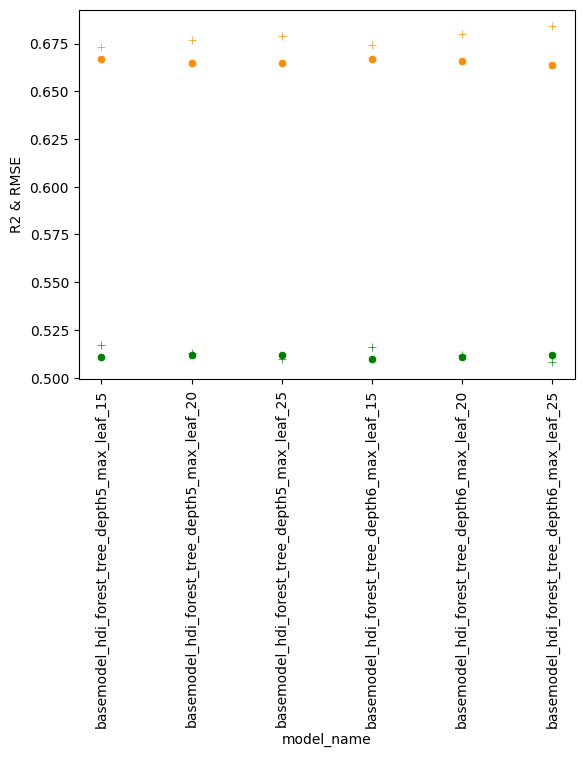

In [33]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Test: AdaBoostRegressor

In [34]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)


y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)


ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,basemodel_hdi_ada_boost,0.672,0.659,0.532,0.106,0.653,0.665,0.52,0.103,0.019,0.006,0.012


that is really nice!!

In [35]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [36]:
gbr = GradientBoostingRegressor(n_estimators=50,
                                criterion= 'squared_error',
                                random_state=8)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':r2_score(y_train, y_pred_gbr_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':r2_score(y_test, y_pred_gbr_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,basemodel_hdi_gbr_boost,0.65,0.681,0.65,0.668,0.0,0.013


In [37]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 8,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  
  
choose from the error_dfs the top models: 

In [38]:
part_lin_reg = lin_reg_error_df.sort_values(by =['delta_MAE', 'test_mae']).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
5,basemodel_hdi_lin_reg_6,0.682,0.649,0.537,0.107,0.657,0.661,0.512,0.102,0.025,0.025,0.012
7,basemodel_hdi_lin_reg_8,0.682,0.649,0.536,0.107,0.656,0.662,0.510,0.101,0.026,0.026,0.013
9,basemodel_hdi_lin_reg_10,0.681,0.650,0.535,0.107,0.655,0.663,0.508,0.101,0.026,0.027,0.013


In [39]:
part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae']).iloc[:6]
part_knn

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,basemodel_hdi_knn_1_15,0.673,0.515,0.103,0.656,0.518,0.103,0.003,0.017
1,basemodel_hdi_knn_2_15,0.673,0.515,0.103,0.656,0.518,0.103,0.003,0.017
2,basemodel_hdi_knn_3_15,0.673,0.515,0.103,0.656,0.518,0.103,0.003,0.017


In [40]:
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae']).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
8,basemodel_hdi_dectree_dep_5_max_leaf_26,0.660,0.672,0.513,0.102,0.655,0.663,0.513,0.102,0.005,0.000,0.009
17,basemodel_hdi_dectree_dep_6_max_leaf_26,0.657,0.675,0.511,0.102,0.656,0.661,0.510,0.101,0.001,0.001,0.014
23,basemodel_hdi_dectree_dep_7_max_leaf_20,0.659,0.673,0.515,0.103,0.660,0.657,0.514,0.102,0.001,0.001,0.016
7,basemodel_hdi_dectree_dep_5_max_leaf_24,0.660,0.671,0.513,0.102,0.654,0.663,0.511,0.101,0.006,0.002,0.008
16,basemodel_hdi_dectree_dep_6_max_leaf_24,0.658,0.674,0.512,0.102,0.655,0.662,0.509,0.101,0.003,0.003,0.012
6,basemodel_hdi_dectree_dep_5_max_leaf_22,0.660,0.671,0.514,0.102,0.654,0.664,0.511,0.101,0.006,0.003,0.007


In [41]:
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae']).iloc[:6]
part_forest

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
4,basemodel_hdi_forest_tree_depth6_max_leaf_20,0.680,0.512,0.102,0.666,0.511,0.101,0.001,0.014,39,6,100
1,basemodel_hdi_forest_tree_depth5_max_leaf_20,0.677,0.513,0.102,0.665,0.512,0.102,0.001,0.012,39,5,100
2,basemodel_hdi_forest_tree_depth5_max_leaf_25,0.679,0.510,0.102,0.665,0.512,0.102,0.002,0.014,49,5,100
5,basemodel_hdi_forest_tree_depth6_max_leaf_25,0.684,0.508,0.101,0.664,0.512,0.102,0.004,0.020,49,6,100
3,basemodel_hdi_forest_tree_depth6_max_leaf_15,0.674,0.516,0.103,0.667,0.510,0.101,0.006,0.007,29,5,100
0,basemodel_hdi_forest_tree_depth5_max_leaf_15,0.673,0.517,0.103,0.667,0.511,0.101,0.006,0.006,29,5,100


In [42]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,basemodel_hdi_ada_boost,0.672,0.659,0.532,0.106,0.653,0.665,0.520,0.103,0.019,0.012,0.006,NaN,NaN,NaN
0,basemodel_hdi_forest_tree_depth5_max_leaf_15,NaN,0.673,0.517,0.103,NaN,0.667,0.511,0.101,NaN,0.006,0.006,29.0,5.0,100.0
6,basemodel_hdi_dectree_dep_5_max_leaf_22,0.660,0.671,0.514,0.102,0.654,0.664,0.511,0.101,0.006,0.003,0.007,NaN,NaN,NaN
3,basemodel_hdi_forest_tree_depth6_max_leaf_15,NaN,0.674,0.516,0.103,NaN,0.667,0.510,0.101,NaN,0.006,0.007,29.0,5.0,100.0
7,basemodel_hdi_dectree_dep_5_max_leaf_24,0.660,0.671,0.513,0.102,0.654,0.663,0.511,0.101,0.006,0.002,0.008,NaN,NaN,NaN
8,basemodel_hdi_dectree_dep_5_max_leaf_26,0.660,0.672,0.513,0.102,0.655,0.663,0.513,0.102,0.005,0.000,0.009,NaN,NaN,NaN
5,basemodel_hdi_lin_reg_6,0.682,0.649,0.537,0.107,0.657,0.661,0.512,0.102,0.025,0.025,0.012,NaN,NaN,NaN
16,basemodel_hdi_dectree_dep_6_max_leaf_24,0.658,0.674,0.512,0.102,0.655,0.662,0.509,0.101,0.003,0.003,0.012,NaN,NaN,NaN
1,basemodel_hdi_forest_tree_depth5_max_leaf_20,NaN,0.677,0.513,0.102,NaN,0.665,0.512,0.102,NaN,0.001,0.012,39.0,5.0,100.0
7,basemodel_hdi_lin_reg_8,0.682,0.649,0.536,0.107,0.656,0.662,0.510,0.101,0.026,0.026,0.013,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51695/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


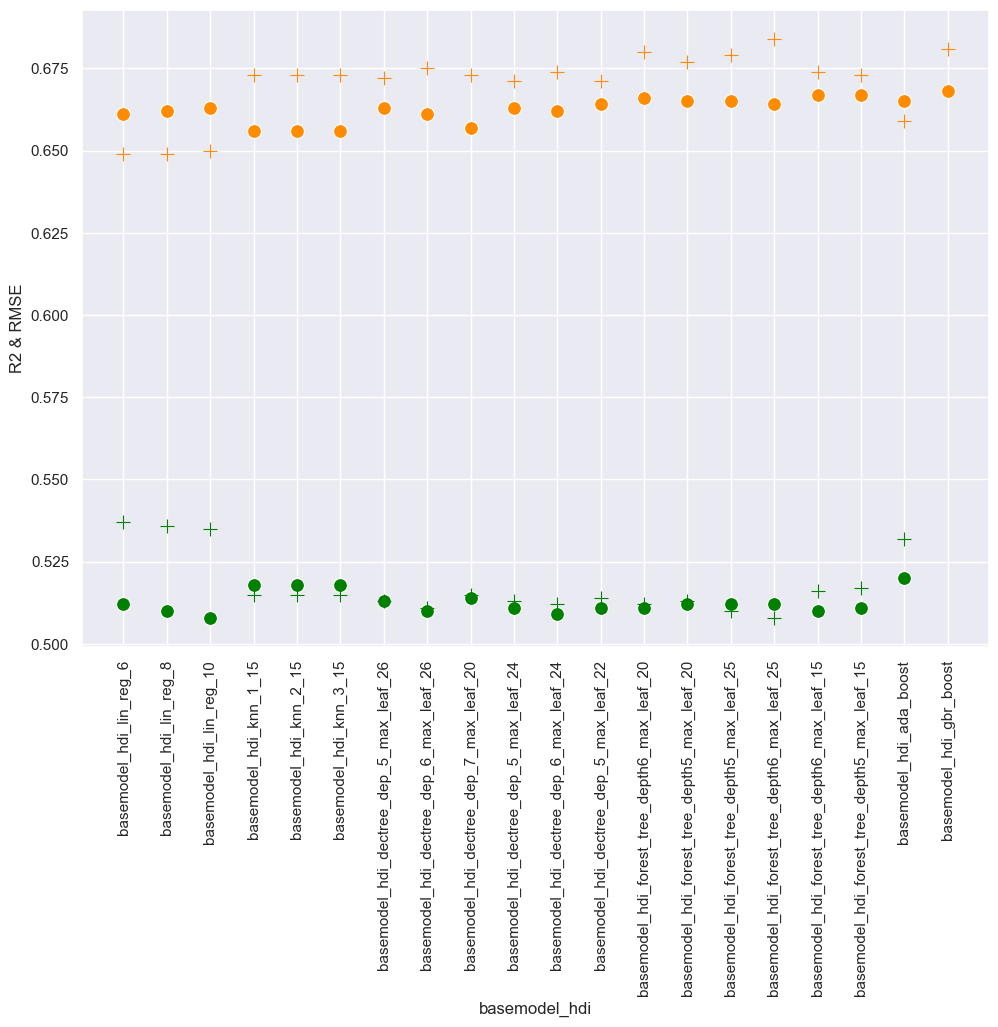

In [43]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [44]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)